# HW2: Data Visualization (70 pts)

This problem set has 3 parts.

## Submit Instruction:

Please restart the kernel and run all before you submit. Submit an .ipynb file to Gradescope by 11:59pm, April 21. 

In [1]:
# import necessary packages here
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Part 1 Visualize the displacement of an object (40pts)


In this part, we are going to visualize the kinematics equation.

Kinematics equation is
$$Y = v_0t + 1/2gt^2,$$ 
where Y represents the displacement of an object in motion, where $v_0$ is the initial velocity, $t$ is the time, and $g=-9.81$ is the acceleration due to gravity.

The goal of this part is to create an animation for moving object. You should write your result as a function which takes 4 inputs (all of them are scalars):

- `v1`: initial value for the first moving object 
- `v2`: initial value for the second moving object 
- `t`: end point of time interval 
- `N`: number of discrete points between time [0,t] 


The output of your function is an animation. Your output should look like the following picture:
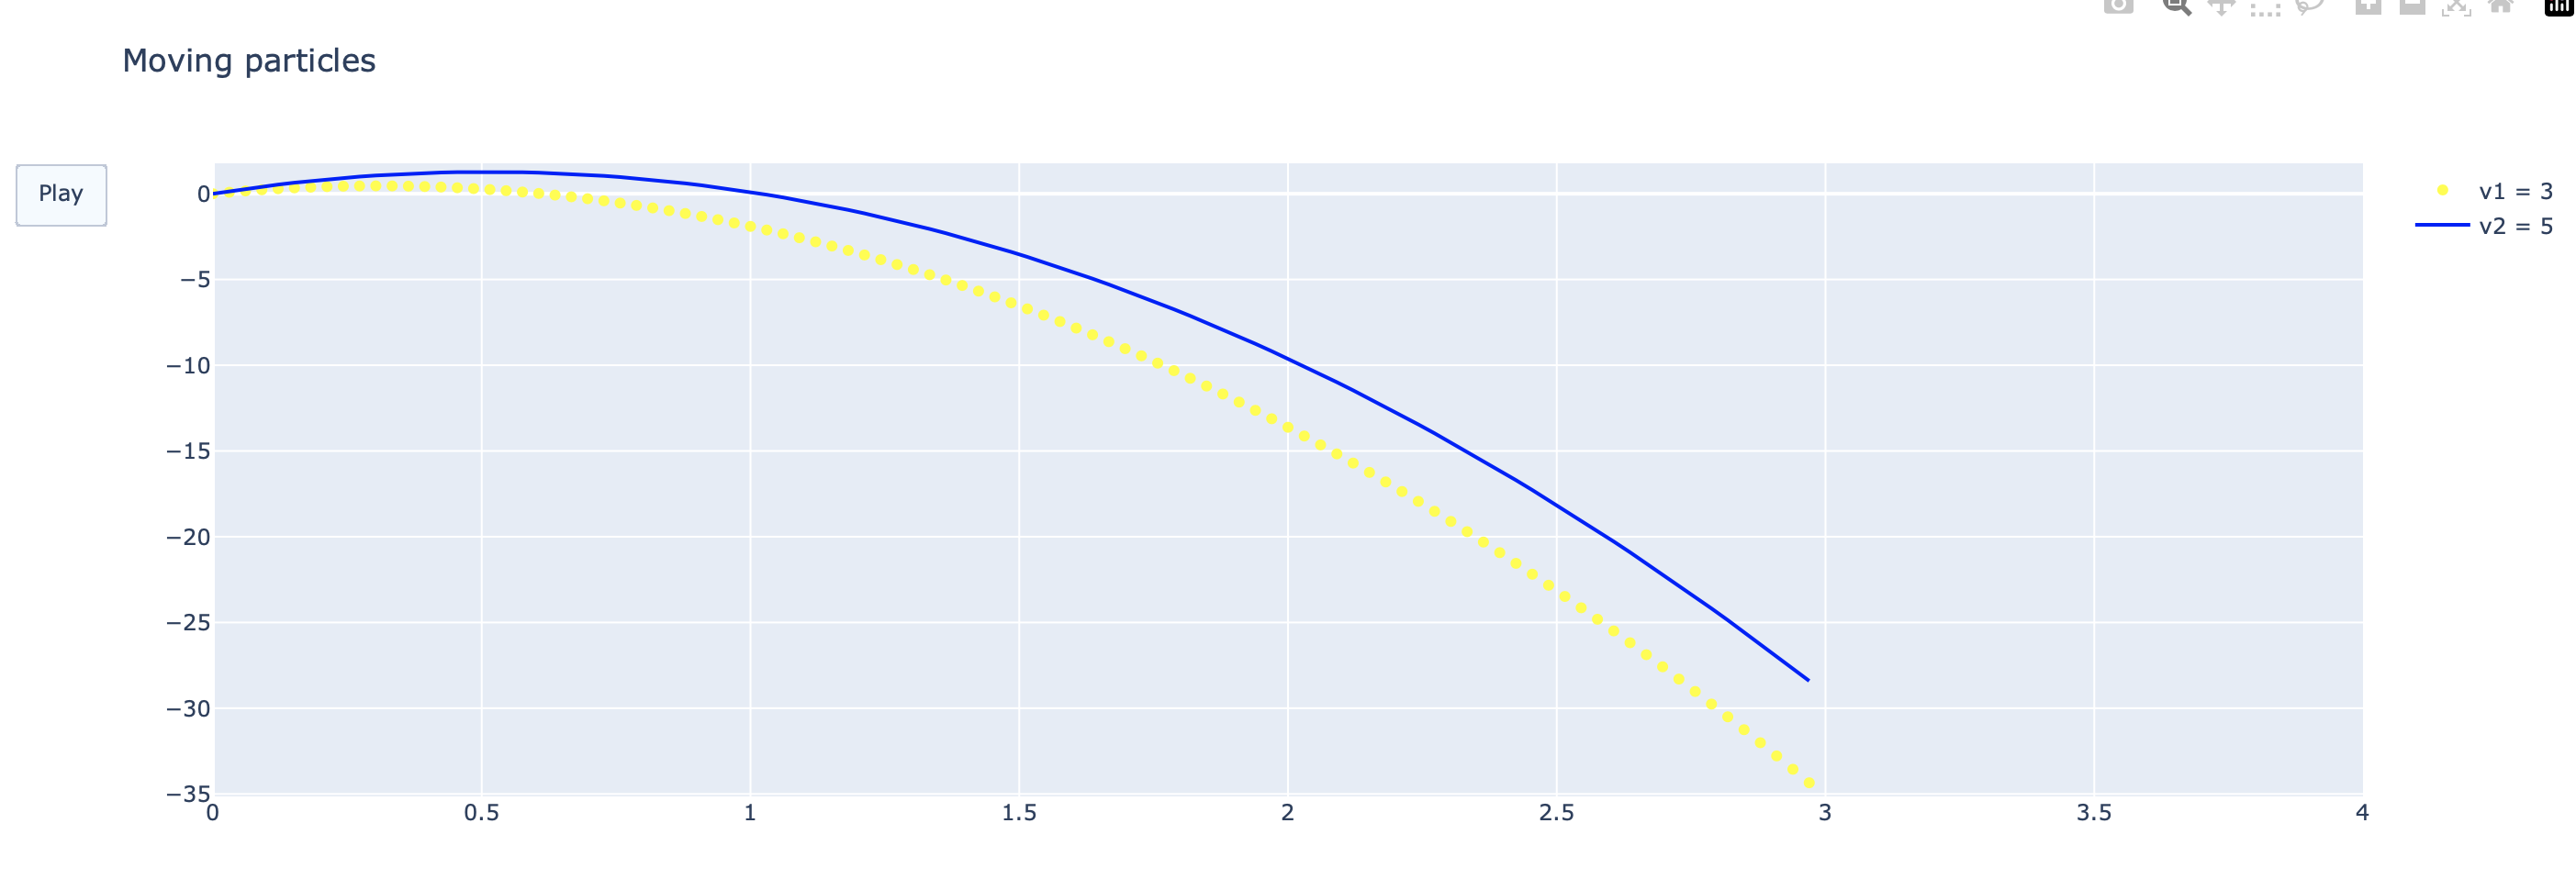

To receive full credits, your code/result should meet the following requirements:
1. It should contain two traces fully for any given initial velocities. In other words, you should adjust xaxis range and yaxis range accordingly. (5pts)
2. One trace contains marker (5pts) and another contains line (5pts).
3. When I play the animation, two traces should be updated at the same time. Updating one by one will cause a grade deduction. (10pts)
4. For each point in the plot, only Y value appear. (5pts)
5. Your plot should be clear, for example, you should change your legend according to your speed. (5pts)
6. Your code should contain necessary comment to explain each step. (5pts)
7. Your code should be able to generalize to any given initial values. In other words, when I change initial values, all above requirements should always be satisfied.

Here, we only consider two traces. Ideally, you are expected to know how to generalize your function to multiple traces (more than 2). 

You have the freedom to set up other features such as line width, marker size, moving speed, play button position, plot title, and etc. But you have to make sure that your plot is clear enough. For example, extremely large marker is not acceptable. 

In [12]:
def two_traces(v1,v2,t,N):
    """
    Plots position of two particles subject to gravity with initial speeds v1 & v1 over t seconds
    Args:
        v1: float
            initial velocity of particle one
        v2: float
            initial velocity of particle two
        t : float
            number of seconds to plot
        N : integer
            number of points to plot for each particle
    Returns:
        Plotly animation of two particles
    
    """
    #creates a set of points on the x axis
    X = np.linspace(0,t,N)
    #calculates the y positions for both particles at each x value
    Y1 = v1*X + (-9.81/2)*X**2
    Y2 = v2*X + (-9.81/2)*X**2
    
    #calculates the range of the plot based on the maximum values for x and y
    range_Y = [min([min(Y1),min(Y2)])-2, max([max(Y1),max(Y2)])+2]
    range_X = [min(X)-.1,max(X)+.1]
    
    #initializes two empty traces
    trace0 = go.Scatter(x=[0], y=[0], mode = "markers", name = f"V1 = {v1}")
    trace1 = go.Scatter(x=[0], y=[0], mode="lines" ,name = f"V2 = {v2}")
    
    #creates a button to animate the frames
    menu = dict(type='buttons', buttons = [dict(label = "Play", method = "animate",args = [None, {"frame": {"duration": 50}}])])
    
    #applies the x and y ranges calculates and adds the menu button
    layout = go.Layout( xaxis=dict(range=range_X), yaxis=dict(range=range_Y), 
                   title_text="Moving Particles", hovermode="closest",
                   updatemenus=[menu])
    
    #initializes the figure
    fig = go.Figure( data = [trace0, trace1], layout = layout )
    
    #list comprehension which generates every frame for both particles
    frames = [go.Frame(data =[go.Scatter(x = X[:n+1], y = Y1[:n+1],hoverinfo = "y",mode="markers"), go.Scatter(x = X[:n+1], y = Y2[:n+1],hoverinfo = 'y',mode = "lines")],traces=[0,1]) for n in range(N)]  
    
    #applies the frames to the figure and displays the animation
    fig.update(frames=frames)
    fig.show()

In [19]:
# test example
v1 = 3
v2 = 5
t = 3 
N = 100
two_traces(v1,v2,t,N)

# Part 2: Covid data visualization (20pts)

The goal of this part is to visualize given covid dataset.

In the dataset, there are 243 countries. To save running time, you should select a subset of countries and then produce the output. Also, you are also allowed to select a specific time range since the dataset contains a long time range. Please make sure that your selection is not empty, otherwise your plot is empty.


No need to write a function for this exercise. To receive full credits, your code/result should meet the following requirements:

1. You should select at least 2 countries to produce your plot. (5pts)
2. You should create animation for this part. Both scatter plot and bar plot are accepted. (5pts)
3. Write a short paragraph to describe what you did for data processing (e.g which countries you select or time range you select). (5pts)
4. Please carefully state your result. You should include what kind of plot you create, your observations and etc. Your plot should match your description. (5pts)


Covid dataset: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/global-data.csv

In [20]:
from datetime import date
from dateutil.rrule import rrule, WEEKLY
import warnings
warnings.filterwarnings("ignore")


def Plotter(Country): 
    """
    Plots two animations of covid deaths/cases over time for three select countries
    Args:
        Country: list
            list of strings countaining the names of exactly three countries
        Returns:
            Two animations for the three countries specified
    
    """
    
    #reads the covid data from a csv
    df = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/global-data.csv")
    #filters the data for only the three included countries
    df = df[(df["Country"] == Country[0]) | (df["Country"] == Country[1]) | (df["Country"] == Country[2])]
    #converts the columnn "Date_reported" from type string to type datetime
    df["Date_reported"] = pd.to_datetime(df["Date_reported"])
    
    #intializes six empty traces
    trace0 = go.Bar(y=[0],name = f"{Country[0]}")
    trace1 = go.Bar(y=[0],name = f"{Country[1]}")
    trace2 = go.Bar(y=[0],name = f"{Country[2]}")
    trace3 = go.Bar(y=[0],name = f"{Country[0]}")
    trace4 = go.Bar(y=[0],name = f"{Country[1]}")
    trace5 = go.Bar(y=[0],name = f"{Country[2]}")
    
    #calculates the range of both plots based on the maximum values in the table
    range_Y1 = int(max(df["Cumulative_cases"]))
    range_Y2 = int(max(df["Cumulative_deaths"]))
    #sets the start and end dates of the animation
    a = date(2020, 1,  5)
    b = date(2023, 12, 17)
    
    #creates a menu button to start an animation
    menu = dict(type='buttons', buttons = [dict(label = "Play", method = "animate",args = [None, {"frame": {"duration": 50}}])])
    
    #sets the layout for plots 1 and 2 with range, plot title, and menu button
    layout1 = go.Layout(yaxis=dict(range=[0,range_Y1]), 
                   title_text="Covid Cases", hovermode="closest",
                   updatemenus=[menu])
    layout2 = go.Layout(yaxis=dict(range=[0,range_Y2]), 
                   title_text="Covid Deaths", hovermode="closest",
                   updatemenus=[menu])
    
    #initializes each figure with their corresponding layouts and traces
    fig1 = go.Figure( data = [trace0, trace1, trace2], layout = layout1)
    fig2 = go.Figure( data = [trace3, trace4, trace5], layout = layout2)
    
    #list comprehensions which generate three bar plots for each week in the time frame for either covid deaths or cases
    frames1 = [go.Frame(data =[go.Bar(y = df[df["Country"] == Country[0]][df["Date_reported"] == dt]["Cumulative_cases"], name = Country[0]+" cases"), 
                              go.Bar(y = df[df["Country"] == Country[1]][df["Date_reported"] == dt]["Cumulative_cases"], name = Country[1]+" cases"),
                              go.Bar(y = df[df["Country"] == Country[2]][df["Date_reported"] == dt]["Cumulative_cases"], name = Country[2]+" cases",legendgrouptitle = {"text" : str(dt)[0:10]})], traces=[0,1,2])
                            for dt in rrule(freq = WEEKLY, dtstart=a, until=b)] 
    frames2 = [go.Frame(data =[go.Bar(y = df[df["Country"] == Country[0]][df["Date_reported"] == dt]["Cumulative_deaths"], name = Country[0]+" deaths"), 
                              go.Bar(y = df[df["Country"] == Country[1]][df["Date_reported"] == dt]["Cumulative_deaths"], name = Country[1]+" deaths"),
                              go.Bar(y = df[df["Country"] == Country[2]][df["Date_reported"] == dt]["Cumulative_deaths"], name = Country[2]+" deaths",legendgrouptitle = {"text" : str(dt)[0:10]})], traces=[0,1,2])
                            for dt in rrule(freq = WEEKLY, dtstart=a, until=b)] 
    
    #updates the figures with their corresponding list of frames, then displays the plots
    fig1.update(frames=frames1)
    fig2.update(frames=frames2)
    fig1.show()
    fig2.show()
                  
#calling the function for countries France, China and Australia
Plotter(["France","China","Australia"])

For data processing I chose France, China, and Australia as my countries as I imagines they would be on the same scale of cases/deaths. I chose to represents cumulative cases and deaths in two sperates barplot animations, covering the entire time period of the dataframe from 2020/1/5 to 2023/12/17. I also implemented an adaptive legend which displays the corresponding date for each frame in the animations.  

From the animations we can see that deaths seems to rise relatively proportionally as a function of cases, with each country experiencing outbreaks at slightly different times. What is especially interesting is that China in the end had more cases then either France or Australia (by virtue of its much larger population) but a significantly lower ration of deaths. This could be a result of a number of factors, from under-reporting stricter quarantine and treatment policies in China. One interesting feature of the animation occurs around december 2022 when China's case number spikes dramatically, which corresponds exactly to the lifting of the zero covid policy in China at that time.

In [21]:
#reference for the dataframe structure
df = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/global-data.csv")
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-12,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-19,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-26,AF,Afghanistan,EMRO,0,0,0,0
4,2020-02-02,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
49675,2023-11-19,ZW,Zimbabwe,AFRO,24,265927,1,5727
49676,2023-11-26,ZW,Zimbabwe,AFRO,48,265975,3,5730
49677,2023-12-03,ZW,Zimbabwe,AFRO,0,265975,0,5730
49678,2023-12-10,ZW,Zimbabwe,AFRO,0,265975,0,5730


# Part 3: choropleth for your travel experience (10pts)


Recall choropleth we discussed during the lecture, we will use built-in us state data to visualize your travel experience picture.


In this picture, you need to use three different colors to describe states that you visited (stay less than 2 month), states that you have stayed (more than 2 months), and states that you want to visit in the future, respectively. All other places should be uncolored. 


A US-state.csv file is provided, you are able to modify this file using python command to make coloring simple. 

Dataset: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/states.csv



To receive full credits, you should write a short paragraph to describe what you did for the given csv file and your result. (10pts)


#### Grading policy
1. tiny mistake (e.g. more than 4 color) in your code (5pts)

2. Your code is good but your explanation does not match/ is unclear/ is not well-written. (5pts)

3. No points given if error message shows up or your result is not desired (e.g. empty picture)

My plot are given for your reference: https://htmlpreview.github.io/?https://github.com/liaochunyang/PIC16/blob/main/PIC16B/01_Visualization/cholopath_Liao.html

In my plot, blue means "stayed", red means "visited", and yellow means "want to visit".


In [136]:
#reading the csv file 
df = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/states.csv")
#drops indeces corresponding to states I don't wish to include, then resets the index
df = df.drop([3,5,6,7,10,13,14,15,17,19,23,27,28,29,30,32,33,34,35,37,38,39,40,41,43,44,45,46,48,49,50] , axis = "index").reset_index()

#adds a new column to the dataframe which acts as a color map
df["color"] = pd.DataFrame([1,0,1,2,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1])

#initializing chloropleth map with the remaining states and corresponding color map
fig = px.choropleth(locations=df["Abbreviation"], locationmode="USA-states", color=df["color"], scope="usa")
fig.show()
